In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
match = pd.read_csv('C:/IPL Win Probability Predictor/Dataset/matches.csv')
delivery = pd.read_csv('C:/IPL Win Probability Predictor/Dataset/deliveries.csv')


In [4]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df['total_runs']  = total_score_df['total_runs'] +1

In [8]:
total_score_df

,match_id,inning,total_runs
0,335982,1,223
1,335982,2,83
2,335983,1,241
3,335983,2,208
4,335984,1,130
...,...,...,...
2212,1426310,2,175
2213,1426311,1,176
2214,1426311,2,140
2215,1426312,1,114


In [9]:
# We only have to keep the total of the first inning
# because we are predicting the winner of the match in second inning


In [10]:
total_score_df=total_score_df[total_score_df['inning'] == 1]

In [11]:
total_score_df

,match_id,inning,total_runs
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
2207,1426307,1,215
2209,1426309,1,160
2211,1426310,1,173
2213,1426311,1,176


In [12]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [13]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,223
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,241
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,130
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,166
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,215
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,160
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,173
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,176


In [14]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [15]:
# Now we will remove all the teams which are not currently playing in the IPL
# We will only keep the teams which are currently playing in the IPL

In [16]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [17]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bengaluru','Royal Challengers Bangalore')

In [18]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [19]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [20]:
match_df.shape

(924, 22)

In [21]:
match_df.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,223


In [22]:
match_df.columns


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')

In [23]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [24]:
match_df['method'].value_counts()

method
D/L    16
Name: count, dtype: int64

In [25]:
match_df['method'].fillna(0, inplace=True) # We will change the method to 0 where it is NaN

In [26]:
match_df['method'].value_counts()

method
0      908
D/L     16
Name: count, dtype: int64

In [27]:
# Now we will remove all the matches where method is D/L
# Because we are predicting the winner of the match and D/L method can change the result of the match

In [28]:
match_df = match_df[match_df['method'] == 0]

In [29]:
match_df.shape

(908, 22)

In [30]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')

In [31]:
# Now we will keep only  those columns which are  required for our model
match_df = match_df[['match_id', 'city', 'winner', 'target_runs']]

In [32]:
delivery_df = match_df.merge(delivery, on = 'match_id')

In [33]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [34]:
delivery_df.shape

(105288, 20)

In [35]:
delivery_df.dtypes

match_id              int64
city                 object
winner               object
target_runs         float64
inning                int64
batting_team         object
bowling_team         object
over                  int64
ball                  int64
batter               object
bowler               object
non_striker          object
batsman_runs          int64
extra_runs            int64
total_runs            int64
extras_type          object
is_wicket             int64
player_dismissed     object
dismissal_kind       object
fielder              object
dtype: object

In [36]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217647,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
217648,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
217649,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
217650,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [37]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs'].cumsum()

In [38]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217647,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
217648,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
217649,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
217650,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [39]:
delivery_df['runs_left'] = delivery_df['target_runs'] - delivery_df['current_score']

In [40]:
delivery_df['balls_left'] = 120 - (delivery_df['over']* 6 + delivery_df['ball'])

In [41]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,222.0,119
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,221.0,118
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,221.0,117
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,220.0,116
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,219.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217647,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,4.0,61
217648,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,3.0,60
217649,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,2.0,59
217650,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,1.0,58


In [42]:
delivery_df['is_wicket'].value_counts()

is_wicket
0    100050
1      5238
Name: count, dtype: int64

In [43]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")

In [44]:
delivery_df['player_dismissed'].unique()

array(['0', '1'], dtype=object)

In [45]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [46]:
# Ensure 'player_dismissed' is numeric before applying cumsum
# delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values


In [47]:
delivery_df['wickets'] = 10 - wickets


In [48]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,222.0,119,10
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,221.0,118,10
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,221.0,117,10
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,220.0,116,10
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,219.0,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217647,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,4.0,61,8
217648,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,3.0,60,8
217649,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,2.0,59,8
217650,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,1.0,58,8


In [49]:
# crr = runs/overs (current run rate)
delivery_df['crr']=(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [50]:
# rrr

delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [51]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,222.0,119,10,6.000000,11.193277
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,221.0,118,10,6.000000,11.237288
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,221.0,117,10,4.000000,11.333333
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,220.0,116,10,4.500000,11.379310
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,219.0,115,10,4.800000,11.426087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217647,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,0,NaN,NaN,110,4.0,61,8,11.186441,0.393443
217648,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,0,NaN,NaN,111,3.0,60,8,11.100000,0.300000
217649,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,0,NaN,NaN,112,2.0,59,8,11.016393,0.203390
217650,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,0,NaN,NaN,113,1.0,58,8,10.935484,0.103448


In [52]:
# We will pass this function to apply method to get the result of the match by 1 if the team batting wins and 0 if the team bowling wins
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [53]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

In [54]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,1,222.0,119,10,6.000000,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,2,221.0,118,10,6.000000,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,2,221.0,117,10,4.000000,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,3,220.0,116,10,4.500000,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,223.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,4,219.0,115,10,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217647,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,NaN,NaN,110,4.0,61,8,11.186441,0.393443,1
217648,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,NaN,NaN,111,3.0,60,8,11.100000,0.300000,1
217649,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,NaN,NaN,112,2.0,59,8,11.016393,0.203390,1
217650,1426312,Chennai,Kolkata Knight Riders,114.0,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,NaN,NaN,113,1.0,58,8,10.935484,0.103448,1


In [55]:
delivery_df.sample()

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
53308,548316,Delhi,Delhi Daredevils,111.0,2,Delhi Daredevils,Chennai Super Kings,0,3,NV Ojha,...,0,NaN,NaN,12,99.0,117,10,24.0,5.076923,1


In [56]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'target_runs', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'crr', 'rrr', 'result'],
      dtype='object')

In [57]:
delivery_df['total_runs']

124       1
125       1
126       0
127       1
128       1
         ..
217647    1
217648    1
217649    1
217650    1
217651    1
Name: total_runs, Length: 105288, dtype: int64

In [58]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'target_runs', 'crr', 'rrr', 'result']]


In [59]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222.0,119,10,223.0,6.000000,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221.0,118,10,223.0,6.000000,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221.0,117,10,223.0,4.000000,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220.0,116,10,223.0,4.500000,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219.0,115,10,223.0,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
217647,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4.0,61,8,114.0,11.186441,0.393443,1
217648,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3.0,60,8,114.0,11.100000,0.300000,1
217649,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2.0,59,8,114.0,11.016393,0.203390,1
217650,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1.0,58,8,114.0,10.935484,0.103448,1


In [60]:
final_df = final_df.sample(final_df.shape[0])

In [61]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr,result
7535,Deccan Chargers,Kolkata Knight Riders,Hyderabad,34.0,5,3,205.0,8.921739,40.8,0


In [62]:
final_df.dropna(inplace=True)

In [63]:
final_df = final_df[final_df['balls_left'] != 0]

In [64]:
from sklearn.model_selection import train_test_split
X = final_df.drop('result',axis=1)
y = final_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,crr,rrr
73918,Kolkata Knight Riders,Rajasthan Royals,Kolkata,13.0,25,8,133.0,7.578947,3.120000
31124,Mumbai Indians,Chennai Super Kings,Mumbai,22.0,21,7,181.0,9.636364,6.285714
70555,Delhi Daredevils,Mumbai Indians,Delhi,3.0,19,9,162.0,9.445545,0.947368
133208,Chennai Super Kings,Delhi Daredevils,Delhi,114.0,73,9,163.0,6.255319,9.369863
119263,Delhi Daredevils,Sunrisers Hyderabad,Delhi,176.0,112,10,186.0,7.500000,9.428571
...,...,...,...,...,...,...,...,...,...
197601,Delhi Capitals,Sunrisers Hyderabad,Delhi,48.0,17,4,198.0,8.737864,16.941176
47990,Rajasthan Royals,Chennai Super Kings,Jaipur,82.0,28,5,197.0,7.500000,17.571429
39803,Kolkata Knight Riders,Mumbai Indians,Kolkata,44.0,44,10,134.0,7.105263,6.000000
50066,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,45.0,51,8,129.0,7.304348,5.294118


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
],
    remainder='passthrough'
)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [68]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [70]:
y_pred = pipe.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8064690026954178

In [72]:
pipe.predict_proba(X_test)[22]

array([0.46739576, 0.53260424])

In [77]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','target_runs','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target




In [ ]:
temp_df,target = match_progression(delivery_df,501256,pipe)
temp_df

Target- 136.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
48821,1,5.0,0,5.2,94.8
48827,2,4.0,0,5.5,94.5
48833,3,2.0,1,11.8,88.2
48839,4,8.0,0,9.9,90.1
48846,5,5.0,1,17.0,83.0
48852,6,2.0,1,31.6,68.4
48858,7,2.0,0,35.9,64.1
48864,8,4.0,0,37.5,62.5
48872,9,9.0,0,32.0,68.0
48878,10,8.0,0,28.2,71.8


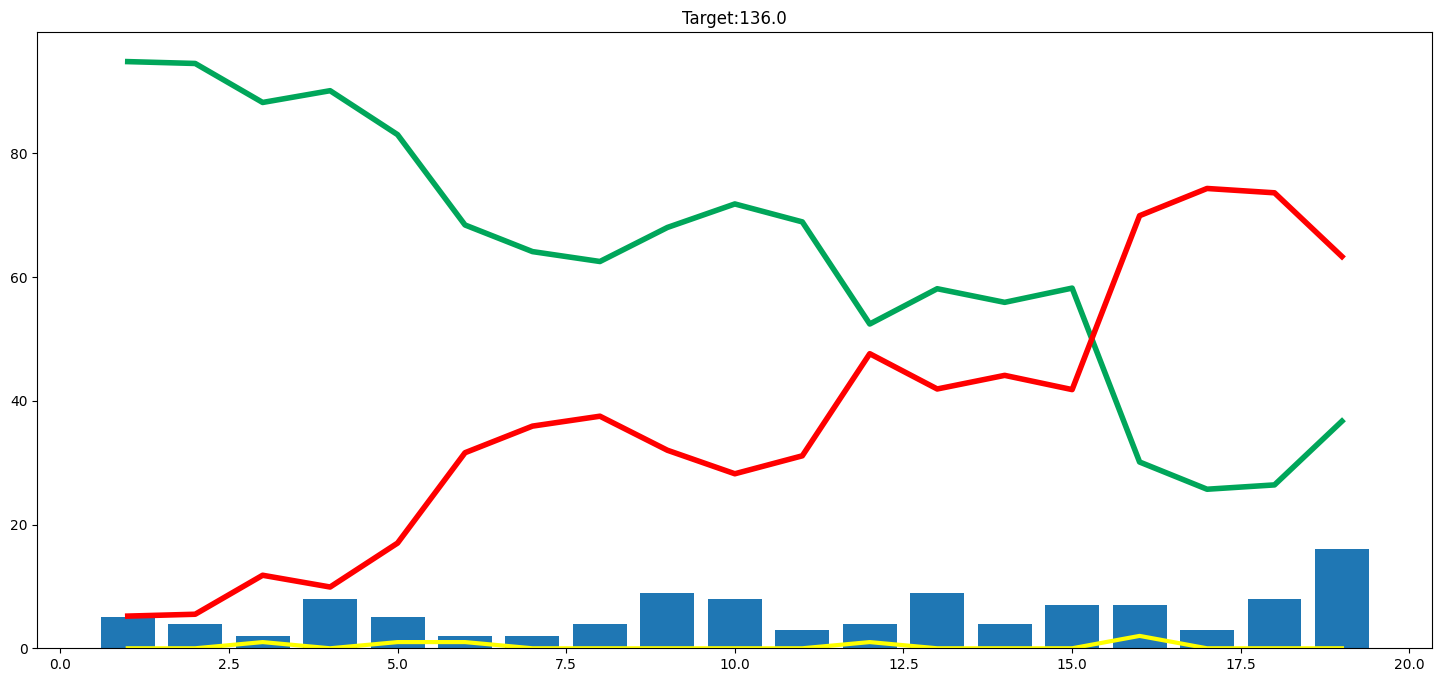

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target:' + str(target))
plt.show()

In [74]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [75]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati'], dtype=object)

In [76]:
import pickle
pickle.dump(pipe, open('model_pipe.pkl', 'wb'))